<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot


## Function

In [6]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [7]:
#Load dataset breast cancer
data = load_breast_cancer()

In [8]:
cancer = pd.DataFrame(data.data, columns=data.feature_names)
cancer['target'] = data.target
cancer.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [9]:
cancer['target'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: target
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [10]:
#Vérfication des valeurs manquantes
na = cancer.isna()
print(na.sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [11]:
#Statistiques univariées
cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [12]:
#Standardisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standard = scaler.fit_transform(cancer.drop(columns = ['target']))
cancer_standard = pd.DataFrame(standard, columns=data.feature_names)

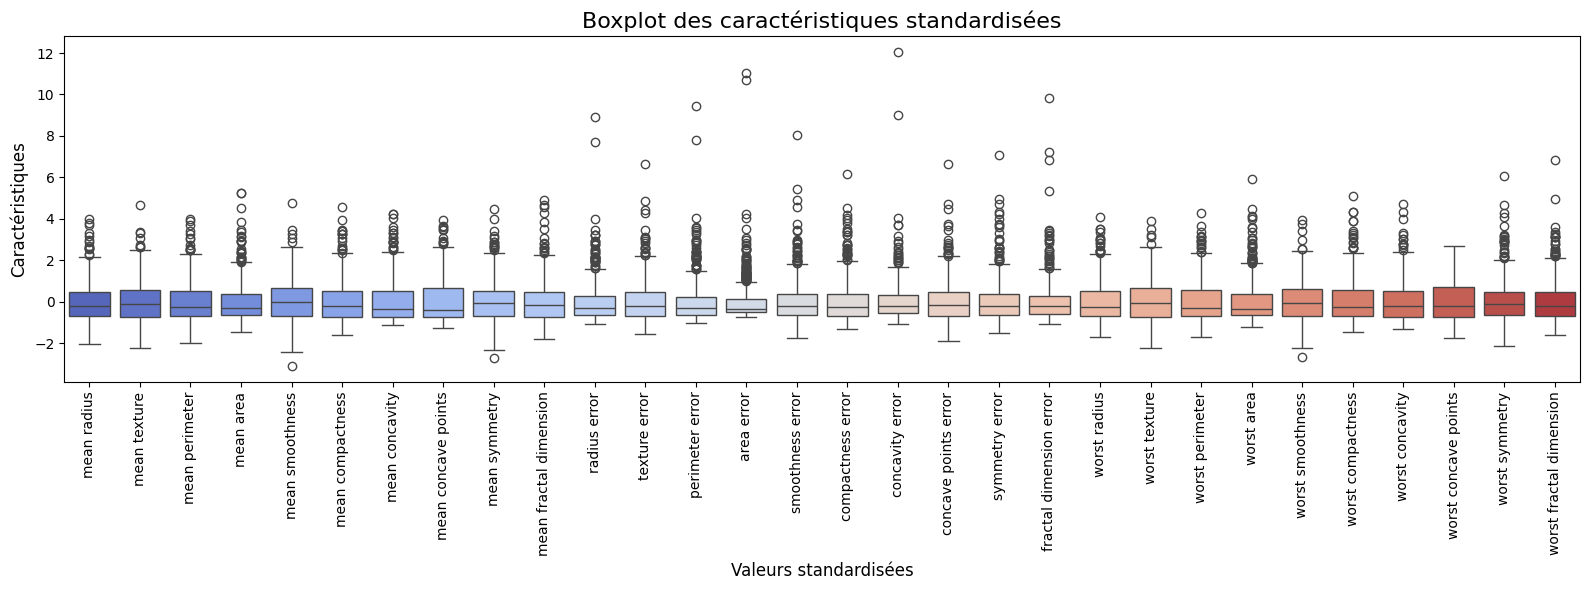

In [13]:
#Visualisation des boxplot
plt.figure(figsize=(16, 6))  # Taille de la figure
sns.boxplot(data=cancer_standard, palette="coolwarm")
plt.title("Boxplot des caractéristiques standardisées", fontsize=16)
plt.xlabel("Valeurs standardisées", fontsize=12)
plt.xticks(rotation = 90)
plt.ylabel("Caractéristiques", fontsize=12)
plt.tight_layout()
plt.show()

In [14]:
#Statisiques bivariées
correlation = cancer.corr(method='spearman')
correlation.style.background_gradient(cmap='coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,0.550247,-0.144499,0.565520,0.738077,-0.326385,0.264904,0.364555,0.410576,-0.241376,-0.008411,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564,-0.732785
mean texture,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,0.363621,0.450720,0.386813,0.395139,0.037048,0.263591,0.287188,0.238610,0.008945,0.147605,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144,-0.461971
mean perimeter,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,0.560326,-0.137578,0.582789,0.745824,-0.311147,0.308620,0.402277,0.441996,-0.228187,0.032429,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961,-0.748496
mean area,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,0.553388,-0.142469,0.568237,0.741518,-0.327431,0.260362,0.362308,0.406468,-0.243507,-0.012688,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758,-0.734122
mean smoothness,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,0.334282,0.091283,0.331360,0.296059,0.338692,0.392455,0.354730,0.438826,0.150740,0.413429,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457,-0.371892
mean compactness,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,0.506582,0.047766,0.583520,0.539511,0.127381,0.817875,0.772283,0.732425,0.098388,0.621121,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986,-0.609288
mean concavity,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,0.575277,0.051318,0.646199,0.644344,0.070321,0.761230,0.858306,0.774656,0.022753,0.513593,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838,-0.733308
mean concave points,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,0.635054,0.008710,0.679841,0.726982,0.016798,0.608388,0.674668,0.758438,-0.028353,0.378374,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110,-0.777877
mean symmetry,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467,0.337912,0.139124,0.354888,0.288322,0.206106,0.435714,0.367637,0.382736,0.384123,0.402630,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069,-0.332567
mean fractal dimension,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000,0.001477,0.157103,0.055309,-0.120333,0.401530,0.481139,0.344007,0.286393,0.314165,0.683800,-0.294540,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771,0.025903


#### 3) Recoder les variables si nécessaire


In [ ]:
#pas besoin de recoder des variables

#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [15]:
# Seuil de corrélation
seuil = 0.8

# Sélectionner les paires de variables fortement corrélées
high_corr_vars = [
    (col1, col2)
    for col1 in correlation.columns
    for col2 in correlation.columns
    if col1 != col2 and abs(correlation.loc[col1, col2]) > seuil
]

# Afficher les paires de variables corrélées
print("Paires de variables fortement corrélées :")
for col1, col2 in high_corr_vars:
    print(f"{col1} - {col2}: {correlation.loc[col1, col2]:.2f}")


Paires de variables fortement corrélées :
mean radius - mean perimeter: 1.00
mean radius - mean area: 1.00
mean radius - worst radius: 0.98
mean radius - worst perimeter: 0.97
mean radius - worst area: 0.98
mean texture - worst texture: 0.91
mean perimeter - mean radius: 1.00
mean perimeter - mean area: 1.00
mean perimeter - worst radius: 0.98
mean perimeter - worst perimeter: 0.98
mean perimeter - worst area: 0.98
mean area - mean radius: 1.00
mean area - mean perimeter: 1.00
mean area - worst radius: 0.98
mean area - worst perimeter: 0.97
mean area - worst area: 0.98
mean compactness - mean concavity: 0.90
mean compactness - mean concave points: 0.85
mean compactness - compactness error: 0.82
mean compactness - worst compactness: 0.90
mean compactness - worst concavity: 0.84
mean compactness - worst concave points: 0.83
mean concavity - mean compactness: 0.90
mean concavity - mean concave points: 0.93
mean concavity - concavity error: 0.86
mean concavity - worst compactness: 0.85
mea

In [16]:
# Supprimer les variables redondantes (basé sur un ordre arbitraire)
columns_to_drop = set()
for col1, col2 in high_corr_vars:
    if col1 not in columns_to_drop:
        columns_to_drop.add(col2)

# Créer un DataFrame sans les variables redondantes
selected_features = [col for col in cancer.columns if col not in columns_to_drop]
cancer_reduced = cancer[selected_features]

print(f"Variables sélectionnées : {selected_features}")


Variables sélectionnées : ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'smoothness error', 'concavity error', 'symmetry error', 'fractal dimension error', 'worst smoothness', 'worst symmetry', 'worst fractal dimension', 'target']


In [17]:
# Corrélation avec la cible
target_corr = cancer_reduced.corr()['target']

# Conserver les variables ayant une corrélation absolue > 0.2 avec la cible
important_features = target_corr[abs(target_corr) > 0.2].index
cancer_final = cancer_reduced[important_features]

print(f"Variables finales sélectionnées : {list(important_features)}")

Variables finales sélectionnées : ['mean radius', 'mean texture', 'mean smoothness', 'mean compactness', 'mean symmetry', 'radius error', 'concavity error', 'worst smoothness', 'worst symmetry', 'worst fractal dimension', 'target']


In [18]:
cancer_final.head(5)

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,radius error,concavity error,worst smoothness,worst symmetry,worst fractal dimension,target
0,17.99,10.38,0.11840,0.27760,0.2419,1.0950,0.05373,0.1622,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.1812,0.5435,0.01860,0.1238,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.2069,0.7456,0.03832,0.1444,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.2597,0.4956,0.05661,0.2098,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.1809,0.7572,0.05688,0.1374,0.2364,0.07678,0


## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [29]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

In [30]:
#1#
cancer_final_2 = cancer_final[['mean radius', 'mean texture','target']]
X = cancer_final_2.drop(columns = 'target')
Y = cancer_final_2['target']

Kernel: linear, Training Accuracy: 0.89, Test Accuracy: 0.90


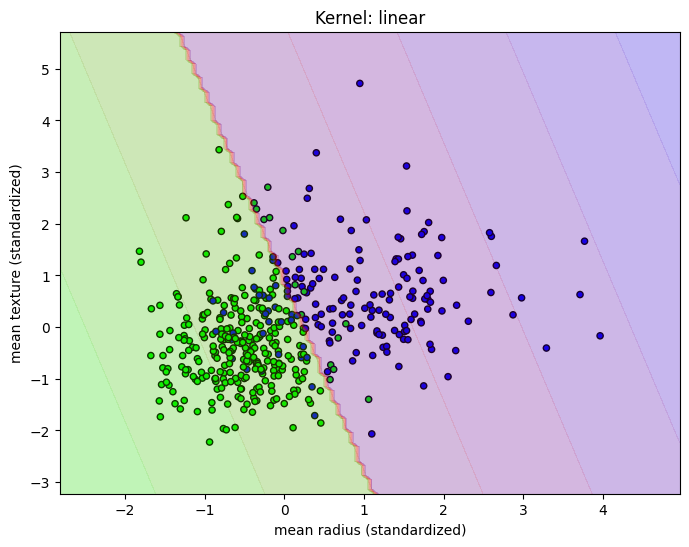

Kernel: poly, Training Accuracy: 0.85, Test Accuracy: 0.82


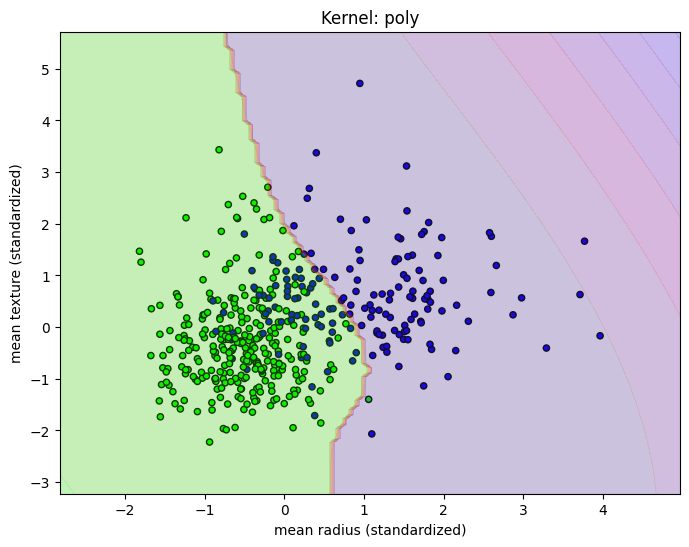

Kernel: rbf, Training Accuracy: 0.91, Test Accuracy: 0.90


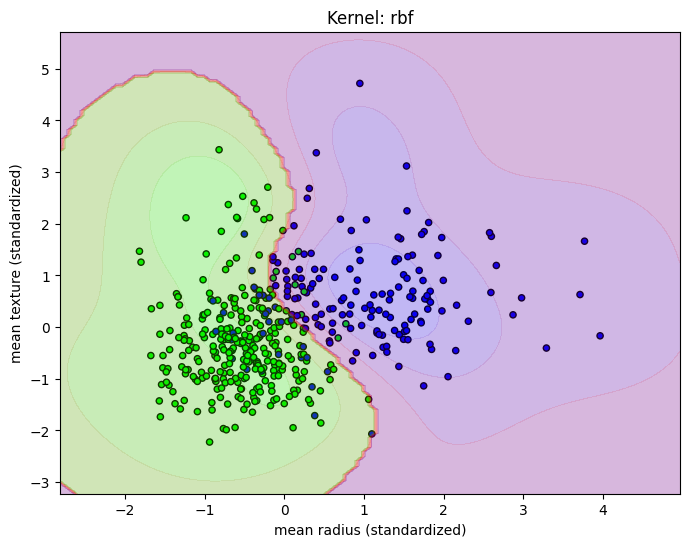

Kernel: sigmoid, Training Accuracy: 0.84, Test Accuracy: 0.84


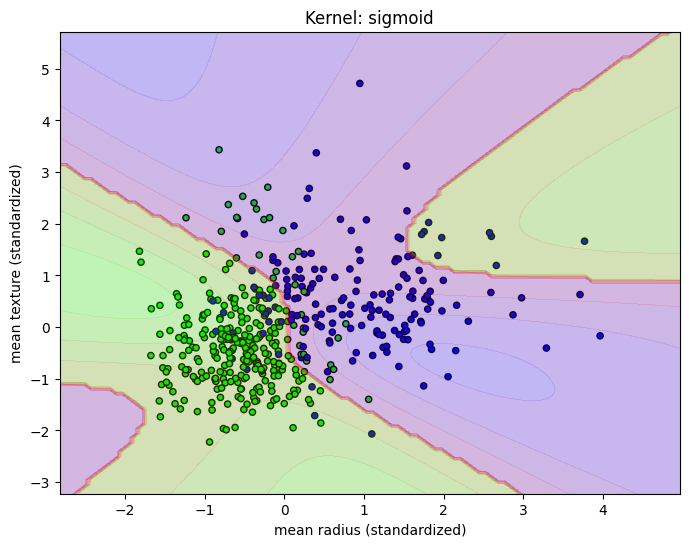

In [31]:
from sklearn.model_selection import train_test_split
#2#
# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
axes = [X_train[:, 0].min() - 1, X_train[:, 0].max() + 1, 
        X_train[:, 1].min() - 1, X_train[:, 1].max() + 1]

for kernel in kernels:
    svc = SVC(kernel=kernel, C=1.0, gamma='scale', random_state=42)
    svc.fit(X_train, y_train)
    print(f"Kernel: {kernel}, Training Accuracy: {svc.score(X_train, y_train):.2f}, Test Accuracy: {svc.score(X_test, y_test):.2f}")
    
    # Tracer les données et la frontière de décision
    plt.figure(figsize=(8, 6))
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, s=20, edgecolors='k')
    plt.title(f"Kernel: {kernel}")
    plt.xlabel('mean radius (standardized)')
    plt.ylabel('mean texture (standardized)')
    plot_predictions(svc, axes)
    plt.show()

C: 0.01, Gamma: 1, Training Accuracy: 0.63, Test Accuracy: 0.62


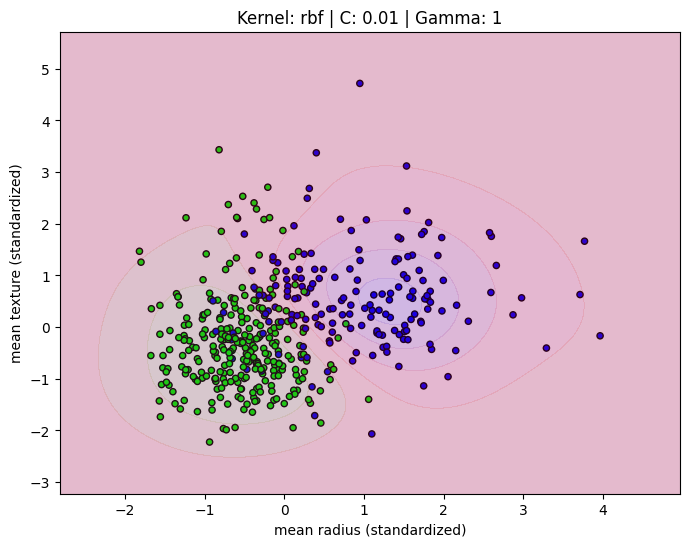

C: 0.01, Gamma: 0.1, Training Accuracy: 0.63, Test Accuracy: 0.62


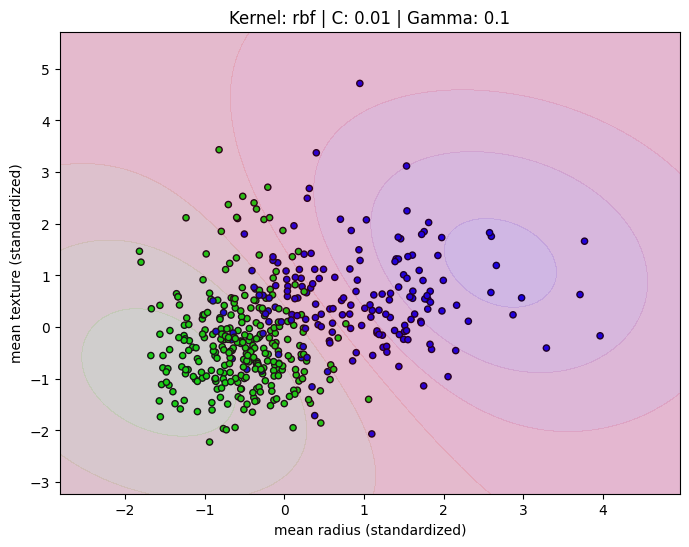

C: 0.01, Gamma: 0.01, Training Accuracy: 0.63, Test Accuracy: 0.62


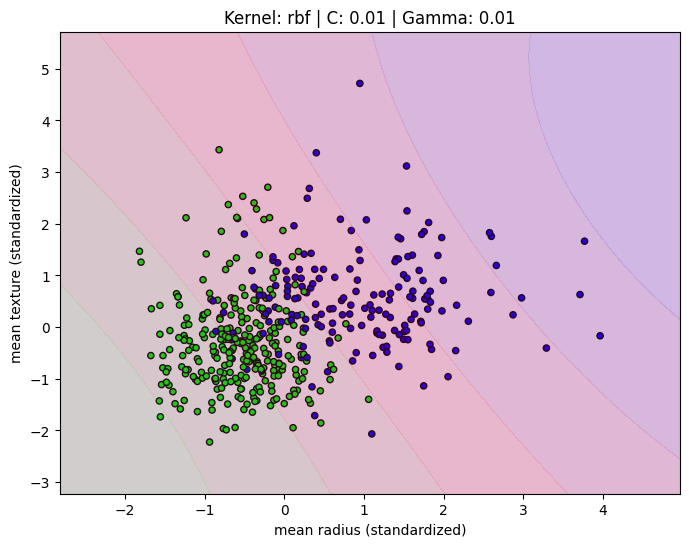

C: 0.01, Gamma: 0.001, Training Accuracy: 0.63, Test Accuracy: 0.62


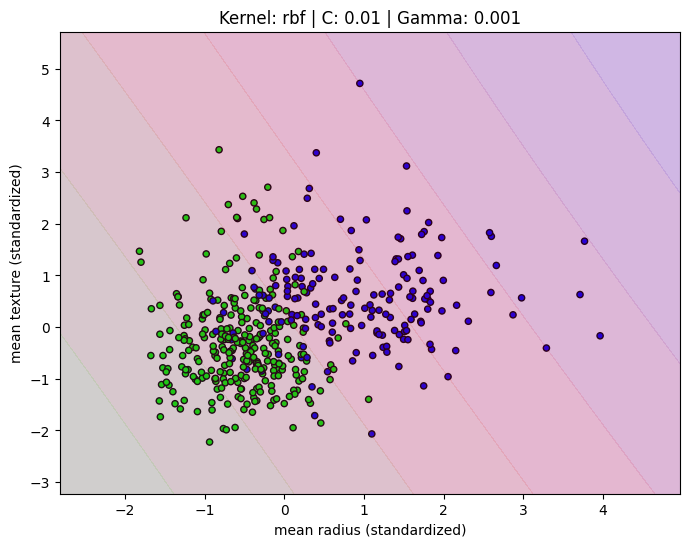

C: 0.1, Gamma: 1, Training Accuracy: 0.91, Test Accuracy: 0.92


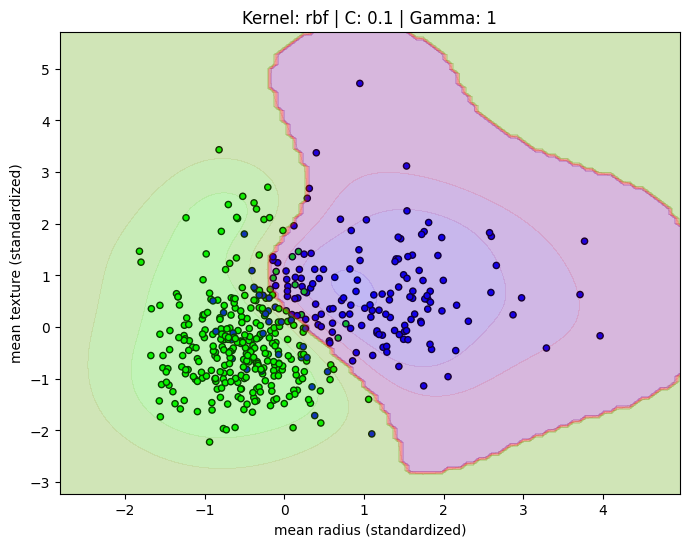

C: 0.1, Gamma: 0.1, Training Accuracy: 0.88, Test Accuracy: 0.88


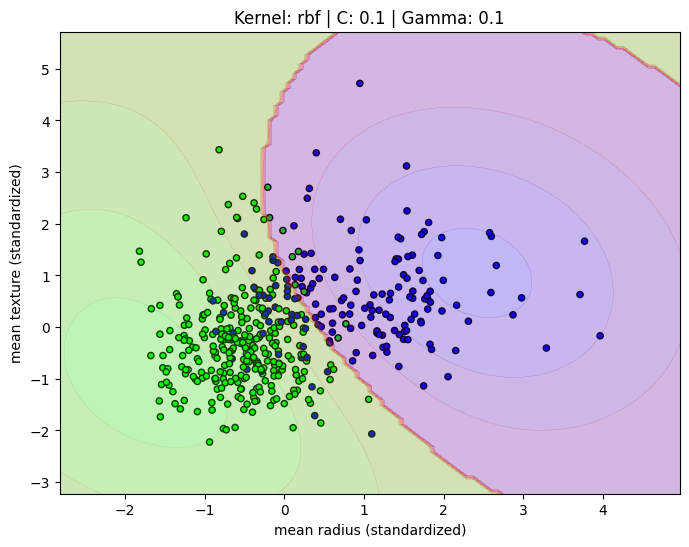

C: 0.1, Gamma: 0.01, Training Accuracy: 0.73, Test Accuracy: 0.74


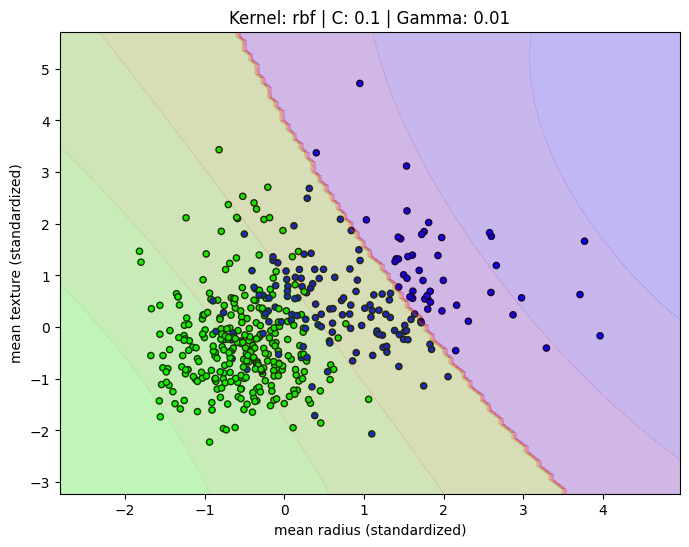

C: 0.1, Gamma: 0.001, Training Accuracy: 0.63, Test Accuracy: 0.62


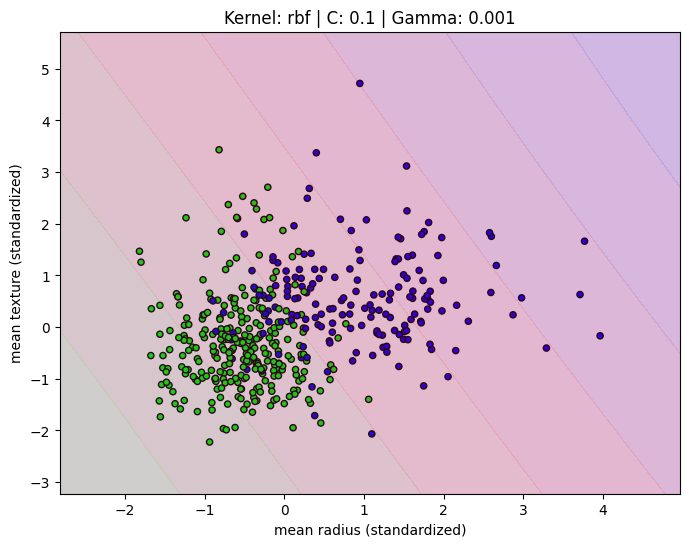

C: 1, Gamma: 1, Training Accuracy: 0.91, Test Accuracy: 0.93


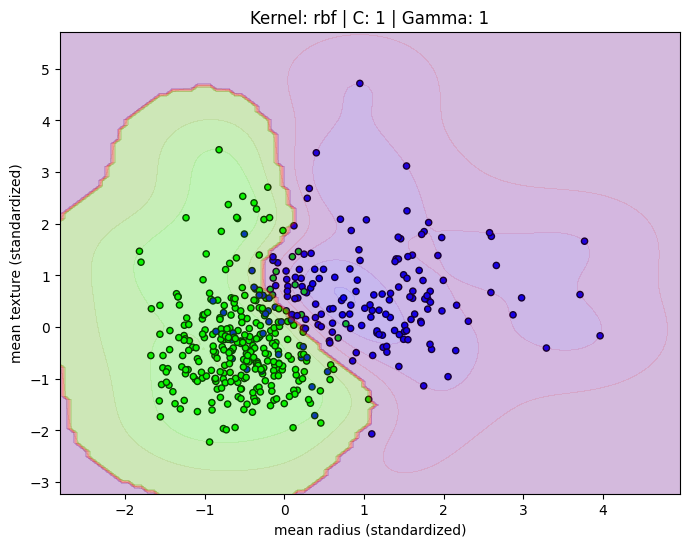

C: 1, Gamma: 0.1, Training Accuracy: 0.91, Test Accuracy: 0.90


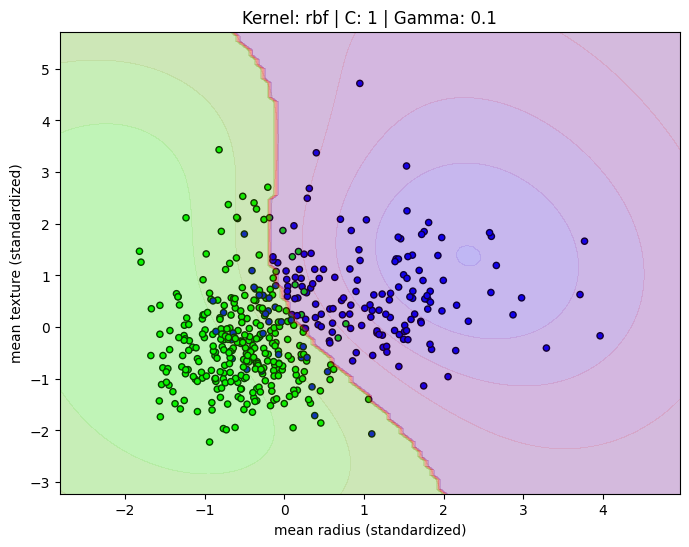

C: 1, Gamma: 0.01, Training Accuracy: 0.87, Test Accuracy: 0.89


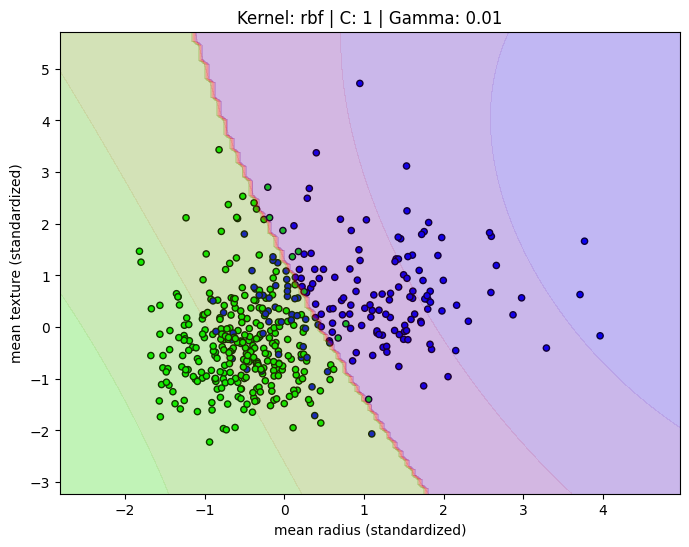

C: 1, Gamma: 0.001, Training Accuracy: 0.74, Test Accuracy: 0.75


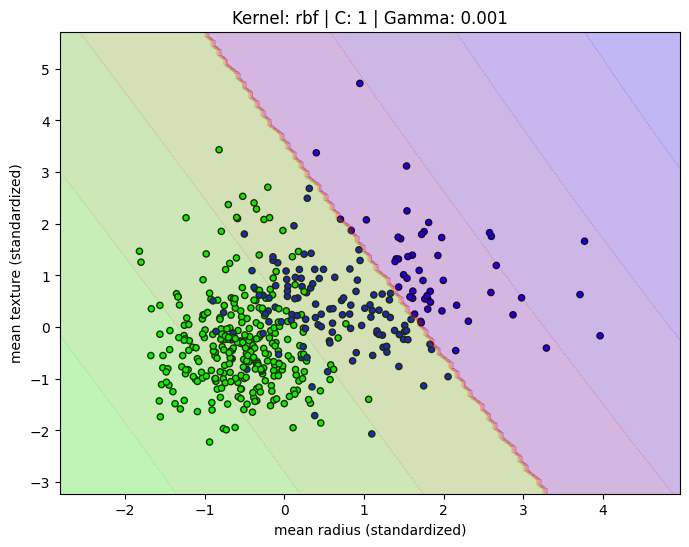

C: 10, Gamma: 1, Training Accuracy: 0.91, Test Accuracy: 0.92


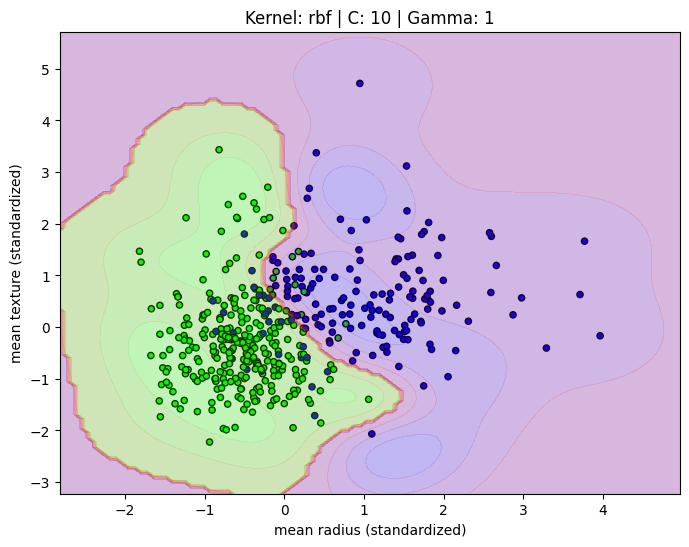

C: 10, Gamma: 0.1, Training Accuracy: 0.91, Test Accuracy: 0.91


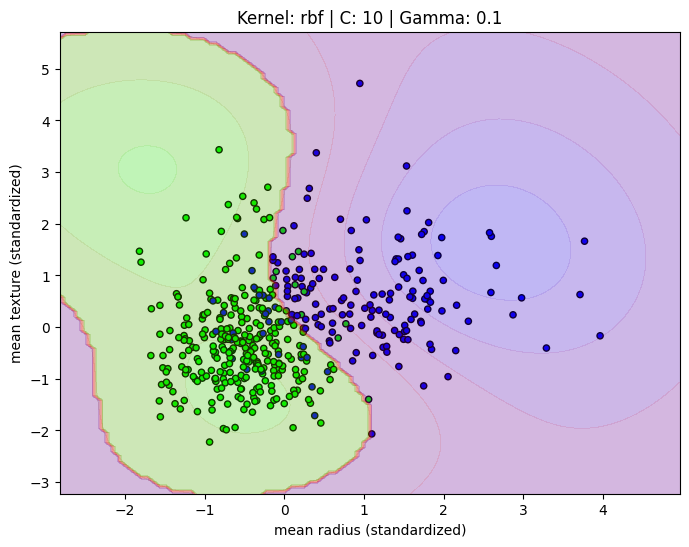

C: 10, Gamma: 0.01, Training Accuracy: 0.89, Test Accuracy: 0.90


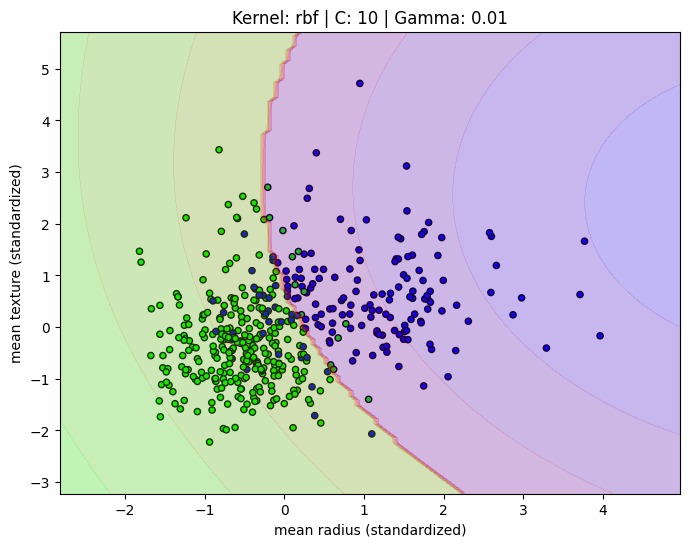

C: 10, Gamma: 0.001, Training Accuracy: 0.87, Test Accuracy: 0.89


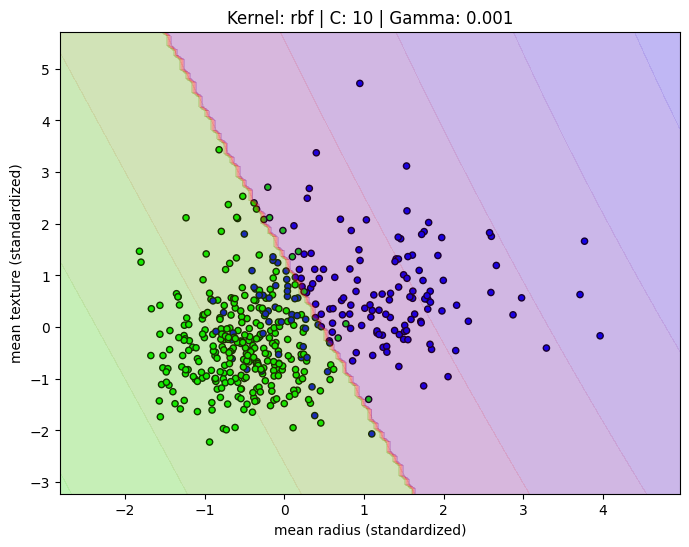

C: 100, Gamma: 1, Training Accuracy: 0.90, Test Accuracy: 0.90


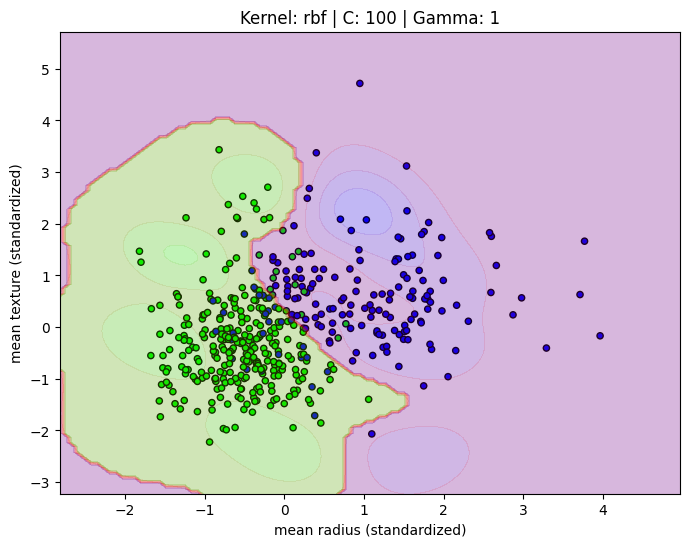

C: 100, Gamma: 0.1, Training Accuracy: 0.91, Test Accuracy: 0.90


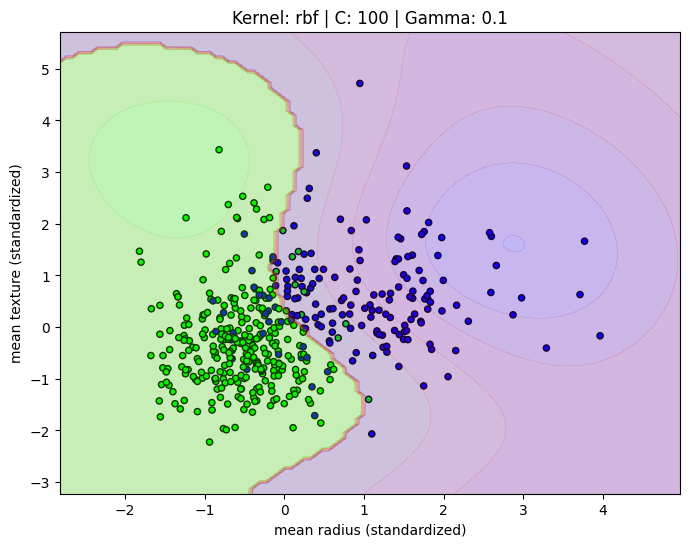

C: 100, Gamma: 0.01, Training Accuracy: 0.90, Test Accuracy: 0.91


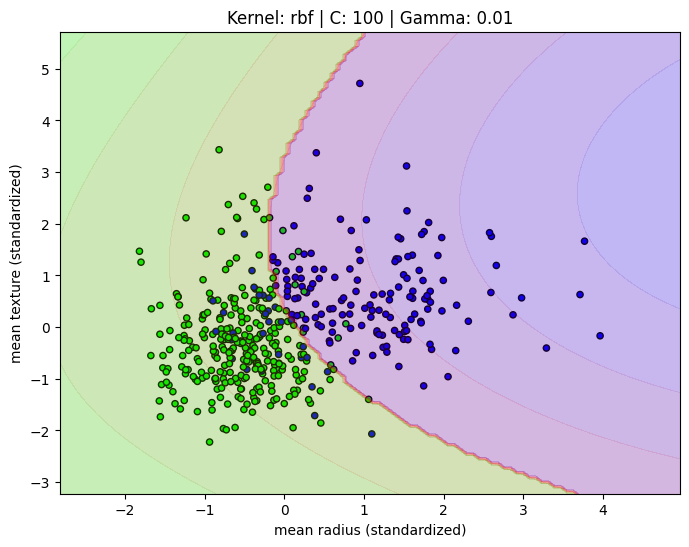

C: 100, Gamma: 0.001, Training Accuracy: 0.88, Test Accuracy: 0.90


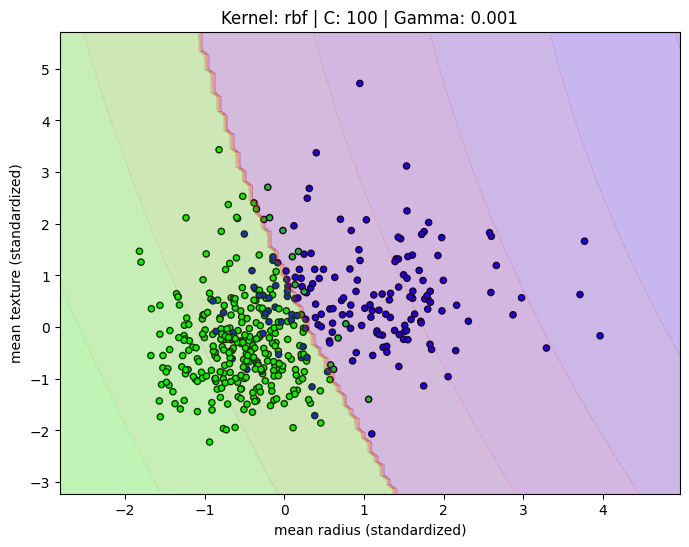

In [32]:
#3#
C_values = [0.01,0.1,1,10,100]
gamma_values = [1, 0.1, 0.01, 0.001]
for C in C_values:
    for gamma in gamma_values:
        svc = SVC(kernel="rbf", C=C, gamma=gamma, random_state=42)
        svc.fit(X_train, y_train)
        
        # Afficher les résultats
        training_accuracy = svc.score(X_train, y_train)
        test_accuracy = svc.score(X_test, y_test)
        print(f"C: {C}, Gamma: {gamma}, Training Accuracy: {training_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
        
        # Tracer les données et la frontière de décision
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.brg, s=20, edgecolors='k')
        plt.title(f"Kernel: rbf | C: {C} | Gamma: {gamma}")
        plt.xlabel('mean radius (standardized)')
        plt.ylabel('mean texture (standardized)')
        plot_predictions(svc, axes)
        plt.show()

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

In [37]:
# Ensemble des features
X = cancer_final.drop(columns = 'target')
Y = cancer_final_2['target']

# Séparation du jeu de donnée
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardiser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Plusieurs kernels à utiliser
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

# Utilisation des SVC
for kernel in kernels:
    svc = SVC(kernel=kernel, random_state=42)
    svc.fit(X_train, y_train)
    
    # Calcul des précisions
    train_accuracy = svc.score(X_train, y_train)
    test_accuracy = svc.score(X_test, y_test)
    results.append({'Kernel': kernel, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})
    
    # Afficher les résultats intermédiaires
    print(f"Kernel: {kernel}, Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")


Kernel: linear, Train Accuracy: 0.98, Test Accuracy: 0.95
Kernel: poly, Train Accuracy: 0.92, Test Accuracy: 0.83
Kernel: rbf, Train Accuracy: 0.98, Test Accuracy: 0.96
Kernel: sigmoid, Train Accuracy: 0.86, Test Accuracy: 0.86


#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

In [39]:
# Cross-validation sur les modèles
for kernel in kernels:
    svc = SVC(kernel=kernel, random_state=42)
    svc.fit(X_train, y_train)
    
    # Calcul des précisions
    train_accuracy = svc.score(X_train, y_train)
    test_accuracy = svc.score(X_test, y_test)
    results.append({'Kernel': kernel, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy})
    scores_5 = cross_val_score(svc, X_train, y_train, cv=5)
    mean_5 = scores_5.mean()
    std_5 = scores_5.std()
    scores_10 = cross_val_score(svc, X_train, y_train, cv=10)
    mean_10 = scores_10.mean()
    std_10 = scores_10.std()
    # Afficher les résultats intermédiaires
    print(f"Kernel: {kernel}, Train Accuracy: {train_accuracy:.2f}, Test Accuracy: {test_accuracy:.2f}")
    print(f"  - Précision moyenne globale: {(mean_5 + mean_10) / 2:.4f}")
    print(f"  - Robustesse (écart-type moyen): {(std_5 + std_10) / 2:.4f}\n")  


Kernel: linear, Train Accuracy: 0.98, Test Accuracy: 0.95
  - Précision moyenne globale: 0.9571
  - Robustesse (écart-type moyen): 0.0214

Kernel: poly, Train Accuracy: 0.92, Test Accuracy: 0.83
  - Précision moyenne globale: 0.9055
  - Robustesse (écart-type moyen): 0.0332

Kernel: rbf, Train Accuracy: 0.98, Test Accuracy: 0.96
  - Précision moyenne globale: 0.9582
  - Robustesse (écart-type moyen): 0.0196

Kernel: sigmoid, Train Accuracy: 0.86, Test Accuracy: 0.86
  - Précision moyenne globale: 0.8681
  - Robustesse (écart-type moyen): 0.0386



#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>